In [ ]:
from ocsmesh import Raster, Geom, Hfun, utils 
import matplotlib.pyplot as plt 
import geopandas as gpd 

### The raster files:

1) North: 40.66 South:40.6, West:14.47, East:14.62 
2) North: 40.65, South: 40.61, West: 14.49, East: 14.61.tif 
3) North: 40.67,  South: 40.59, West: 14.46, East: 14.64 
4) North: 40.7, South: 40.58, West: 14.45, East: 14.65

In [3]:
raster_files = [
    "rasterfiles/gebco_2024_n40.66_s40.6_w14.47_e14.62.tif",
    "rasterfiles/gebco_2024_n40.65_s40.61_w14.49_e14.61.tif",
    "rasterfiles/gebco_2024_n40.67_s40.59_w14.46_e14.64.tif",
    "rasterfiles/gebco_2024_n40.7_s40.58_w14.45_e14.65.tif"
]

<Axes: >

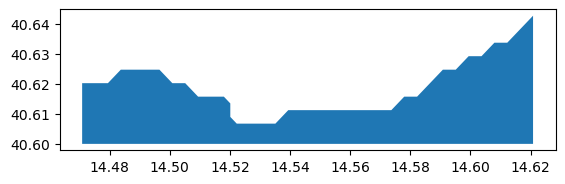

In [ ]:
raster = Raster(raster_files[0])
geom = Geom(raster, zmax=10) 
multipolygon = geom.get_multipolygon()
gpd.GeoSeries(multipolygon).plot()

<Axes: >

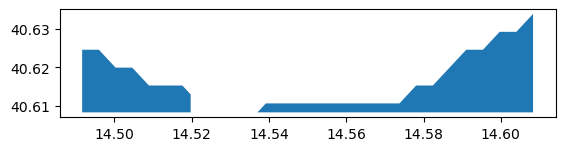

In [ ]:
raster = Raster(raster_files[1])
geom = Geom(raster, zmax=10) 
multipolygon = geom.get_multipolygon()
gpd.GeoSeries(multipolygon).plot()

<Axes: >

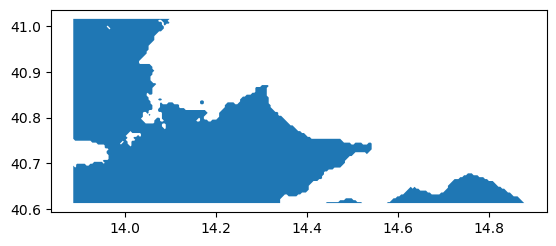

In [ ]:
raster = Raster(raster_files[2])
geom = Geom(raster, zmax=10) 
multipolygon = geom.get_multipolygon()
gpd.GeoSeries(multipolygon).plot()

<Axes: >

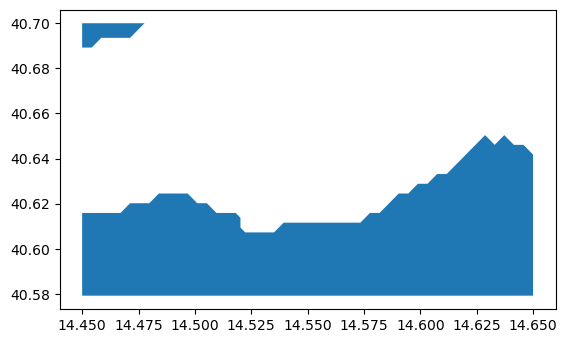

In [ ]:
raster = Raster(raster_files[3])
geom = Geom(raster, zmax=10) 
multipolygon = geom.get_multipolygon()
gpd.GeoSeries(multipolygon).plot()

# Collection of Rasters 
Visualization on the collection of files.

<Axes: >

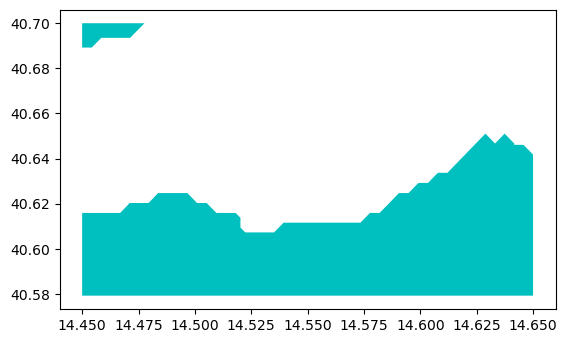

In [12]:
rasters = [Raster(i) for i in raster_files]
geom = Geom(rasters, zmax=10)
multipolygon = geom.get_multipolygon()
gpd.GeoSeries(multipolygon).plot(color='c')

In [13]:
hfun = Hfun(rasters, hmin=100, hmax=41000)

hfun.add_contour(level=0, expansion_rate=0.005, target_size=100)
hfun.add_contour(level=-50, expansion_rate=0.005, target_size=200) 

hfun.add_constant_value(400,lower_bound=0)
hfun.add_constant_value(800, lower_bound=-50) 

hfun_msh_t = hfun.msh_t()

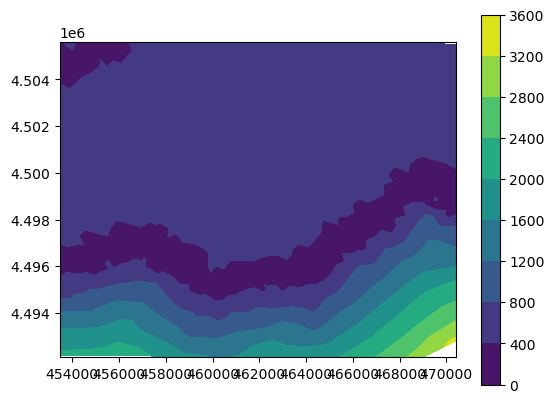

In [ ]:
crd = hfun_msh_t.vert2['coord']
cnn = hfun_msh_t.tria3['index']
val = hfun_msh_t.value.flatten()

fig, ax = plt.subplots()
mappable = ax.tricontourf(crd[:, 0], crd[:, 1], cnn, val)
cb = plt.colorbar(mappable)

ax.set_aspect(1)